In [45]:
import pandas as pd
df = pd.read_excel('/content/underweight.xlsx')
df

,Weight,Height,Class
0,51,167,Underweight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,52,174,Underweight
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal
9,51,170,Underweight


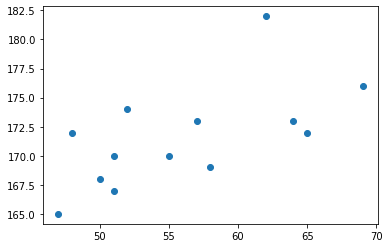

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['Weight'],df['Height'])
plt.show()

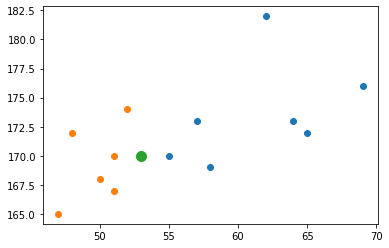

In [47]:
ndf = df[df['Class']=='Normal']
udf = df[df['Class']=='Underweight']
plt.scatter(ndf['Weight'],ndf['Height'])
plt.scatter(udf['Weight'],udf['Height'])
plt.scatter(53,170,s=100)
plt.show()

In [48]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [49]:
y

array(['Underweight', 'Normal', 'Normal', 'Normal', 'Normal',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight',
       'Underweight', 'Underweight', 'Underweight'], dtype=object)

In [50]:
# Encoding - Converting String data into Numerical data
# Label Encoding

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [52]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [53]:
import math
math.sqrt(len(df))

3.605551275463989

In [54]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [64]:
# Predict for the new value.
labels = ['Normal','Underweight']
op = neigh.predict([[53,170]])
labels[op[0]]

'Underweight'

In [56]:
# Maths behind algorithm

op_c = neigh.kneighbors([[53,170]])
op_c

(array([[2.        , 2.        , 3.60555128]]), array([[9, 8, 0]]))

In [57]:
type(op_c)

tuple

In [58]:
op_c[0]
# distance of testing value from 3 nearest neighbors

array([[2.        , 2.        , 3.60555128]])

In [59]:
op_c[1]
# index value of 3 nearest neighbors

array([[9, 8, 0]])

In [60]:
# Plot decision region 
!pip install mlxtend==0.19.0 --quiet

In [61]:
from mlxtend.plotting import plot_decision_regions

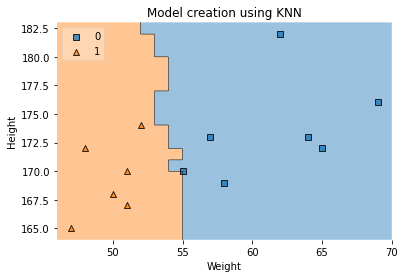

In [65]:
# Plotting decision regions
plot_decision_regions(x, y , neigh , legend=2)                      

# Adding axes annotations
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Model creation using KNN')
plt.show()